In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mmorenorolon/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Salmon Catches by Region (1878–1997)'}, xlabel='Region', ylabel='Average Salmon Catches (in thousands of fish)'>

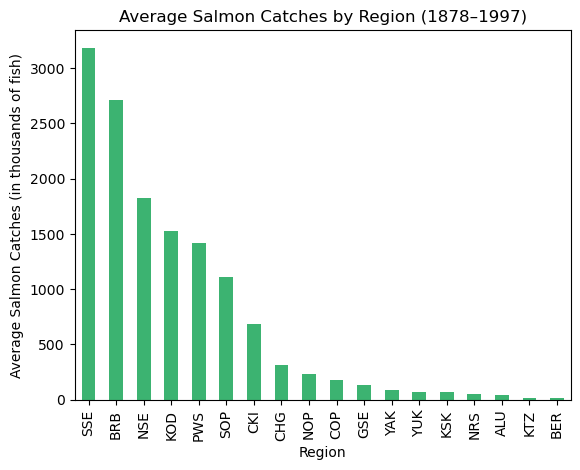

In [37]:
# FINAL CODE
# Import necessary libraries
import numpy as np
import pandas as pd

# Import the data from `salmon_data.csv`
catch_data = pd.read_csv('data/salmon_data.csv')

# Remove the `notesRegCode` column from the dataframe
catch_data = catch_data.drop(columns = 'notesRegCode')

# Replace value 'I' with numeric value `1` in row 400
catch_data.loc[400, 'Catch'] = 1

# Update the `Catch` column type to `int64`
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Calculate average salmon catch per region
avg_region = catch_data.groupby('Region', as_index = False)['Catch'].mean()

# Create a bar plot of average salmon catches by region 
avg_region.sort_values(by='Catch', ascending = False).plot(
    kind='bar',
    x='Region',
    y='Catch',
    color='mediumseagreen',
    title='Average Salmon Catches by Region (1878–1997)',
    xlabel='Region',
    ylabel='Average Salmon Catches (in thousands of fish)',
    legend=False
)

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
# Import necessary libraries
import numpy as np
import pandas as pd

# Import the data from `salmon_data.csv`
catch_data = pd.read_csv('data/salmon_data.csv')

# View the first five rows of the dataframe
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. Preliminary data exploration

# Display summary of dataframe including, data types, column names, non-null counts, and memory usage
catch_data.info()

# View the data type of each column in the dataframe
print(catch_data.dtypes)

# Show the number of rows and columns in the dataframe
print("Shape of dataframe:\n", catch_data.shape)

# View the total number of missing values (NA) in each column
print("Missing values per column:\n", catch_data.isna().sum())

# View the number of unique values in each column
print("Unique values per column:\n", catch_data.nunique())

# View the unique values for the Year column
print("Unique values of the Year column", catch_data['Year'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB
Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
Shape of dataframe:
 (8540, 5)
Missing values per column:
 Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64
Unique values per column:
 Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64
Unique values of the Year column [1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 189

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I began my preliminary data exploration using the following pandas methods: `df.info()`, `df.dtypes`, `df.shape`, `df.isna().sum()`, and `df.nunique()`. These helped me assess the structure, data types, missing values, and uniqueness of the dataset's contents.

First, `catch_data.info()` provided a succinct summary of the DataFrame, including column names, non-null counts, data types, and memory usage (approximately 333.7 KB). While this method doesn't confirm the class of the dataset directly, it does indicate that we're working with a pandas.DataFrame. It also confirmed the presence of five columns, consistent with the earlier output from `catch_data.head()`. Four of the five columns are stored as object types, meaning their values are treated as strings. The `Year` column is stored as `int64`, indicating integer values. Interestingly, the `Catch` column is also stored as an object, even though its entries appear to be numeric, which suggests a potential need for type conversion.

Second, `catch_data.dtypes` reaffirmed the data types of each column and highlights the same discrepancy in the `Catch` column. Third, `catch_data.shape` revealed that the dataset contains 8,540 rows and 5 columns. Fourth, `catch_data.isna().sum()` identified missing values, with the `notesRegCode` column containing 7,125 null entries, which is a significant portion of the dataset.

Finally, `catch_data.nunique()` showed the number of unique values in each column. The Region column has 18 unique entries, indicating data from 18 distinct regions. The `Year` column has 120 unique values, which initially seems inconsistent with the expected study period of 1886 to 1997 from the metadata (a span of 112 years). Upon further inspection of the actual unique years using `catch_data['Year'].unique()`, I found that the dataset includes additional years outside the expected range: 1878–1885. According to the metadata, the dataset contains all the the salmon catches reported in the Alaska Department of Fish and Game report, confirming that the dataset contains records predating the formal study period.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Find the unique values of the `notesRegCode` column
notes_unique = catch_data['notesRegCode'].unique()

# View the output for the unique values of the `notesRegCode` column
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Remove the `notesRegCode` column from the dataframe
catch_data = catch_data.drop(columns = 'notesRegCode')

# View the dataframe to verify the column was removed
catch_data

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0
...,...,...,...,...
8535,NOP,1993,Chum,135
8536,NOP,1994,Chum,84
8537,NOP,1995,Chum,99
8538,NOP,1996,Chum,68


In [8]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Most columns have expected data types, but there is one issue. The `Year` column is correctly stored as `int64`, which is appropriate for representing years. Four other columns are stored as object types. While this is expected for text-based columns like `Region` or `Species`, the `Catch` column is also stored as an object, even though its values appear to be numeric. This suggests a data type mismatch that could require converting the column to a numeric type using pd.to_numeric()._

In [9]:
# View the data type of each column in the dataframe
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [ ]:
# Filter the dataframe to the Catch values containing 'I'
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']]

# View the filtered dataframe
catch_I 

In [ ]:
grader.check("q5")

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [14]:
# Update the value of `I` to 1 in the `Catch` column 
catch_1 = catch_data.loc[[400], ['Region', 'Year', 'Species','Catch']].assign(Catch=1)

# Print catch_1
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [15]:
# Update the `Catch` column to be of type `int64`
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Store the data type of the `Catch` column
catch_column_type = catch_data['Catch'].dtype

# Print catch_column_type
catch_column_type

dtype('int64')

In [16]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [20]:
# Find the average salmon catch per region
avg_region = catch_data.groupby('Region', as_index = False)['Catch'].mean()

# Print avg_region
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


In [21]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Salmon Catches by Region (1878–1997)'}, xlabel='Region', ylabel='Average Salmon Catches (in thousands of fish)'>

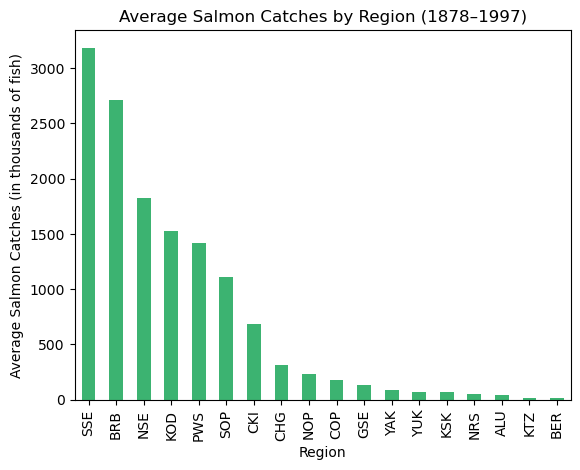

In [33]:
# Create a bar plot to visualize average salmon catches by region from 1878 to 1997
avg_region.sort_values(by = 'Catch', ascending = False).plot(
    kind = 'bar',
    x = 'Region',
    y = 'Catch',
    ylabel = 'Average Salmon Catches (in thousands of fish)',
    color = 'mediumseagreen',
    title = 'Average Salmon Catches by Region (1878–1997)',
    xlabel = 'Region',
    legend = False
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

### Key Takeaways:
Southern Southeast Alaska (SSE) had the highest average salmon catch, exceeding 3 million fish, followed by the Bristol Bay Management Area (BRB) and Northern Southeast Alaska (NSE). Catch volumes show a steady decline across the remaining regions, with the Bering River Subarea (BER) showing the lowest average. The wide variation in catch sizes indicates that there are significant regional differences either in salmon populations, fishing intensity, or environmental conditions.

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [36]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!